In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np
anom_list = [0.001,0.002,0.003,0.004,0.005, 0.006]
#anom_list = np.arange(10)
print (anom_list)
arry = np.array(anom_list)

lower = 0.002 # 2 # 0.002
higher = 0.005 # 5 # 0.005

results =  np.where((arry < lower) | (arry > higher),1,0)

results

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006]


array([1, 0, 0, 0, 0, 1])

In [ ]:
%cd /content/gdrive/Shareddrives/Anomaly/

/content/gdrive/Shareddrives/Anomaly


In [ ]:
!ls

dataset  mate-master_old  metrics  models  notebooks  results  utils


In [ ]:
import numpy as np
from tqdm import tqdm
import json
import pandas as pd
import seaborn as sns
#from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt

In [ ]:
mitbih_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/MIT-BIH Arrhythmia Database.csv')

In [ ]:
mitbih_df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [ ]:
mitbih_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [ ]:
X = mitbih_df.drop(['record', 'type', '0_pre-RR', '0_post-RR', '0_qrs_interval', '0_pq_interval', '0_qt_interval', '0_st_interval', '1_pre-RR', '1_post-RR', '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval'], axis=1)

In [ ]:
X.head()

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,-0.026824,-0.001236,0.016659,0.143241,0.996287,0.038310,0.025784,0.025930,0.025271,0.025930,0.025930,0.025930,0.025930,0.025436,0.025436
1,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,-0.059710,0.104030,0.691891,0.805549,0.084069,0.014264,0.045458,0.032573,-0.104503,-0.042009,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,-0.065686,0.051459,0.630419,0.890794,0.091258,0.021311,0.008246,0.009528,0.008230,0.009528,0.009528,0.009528,0.008786,0.008786,0.008368
3,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,-0.071750,0.059376,0.652814,0.948490,0.136602,-0.000665,-0.009725,-0.010203,-0.010203,-0.020536,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,-0.062915,1.046914,1.046408,1.046408,-0.074639,-0.074639,-0.054516,0.052823,0.296038,0.649990,0.024559,0.016925,0.016053,-0.099918,0.016053,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [ ]:
X.shape

(100689, 20)

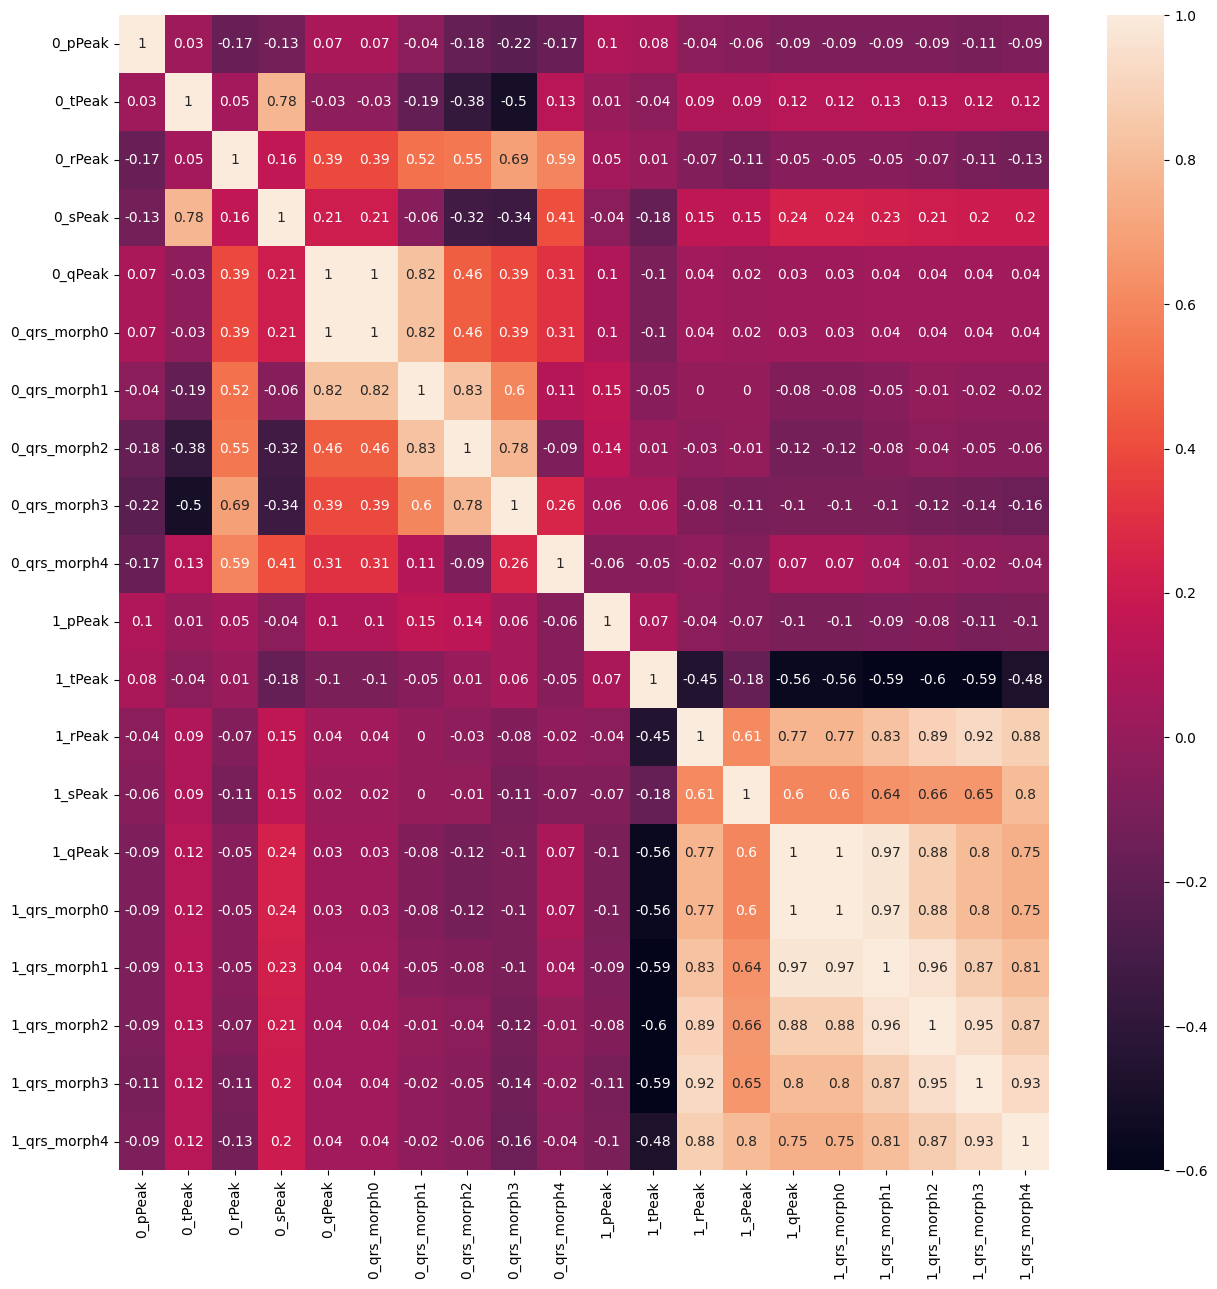

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr().round(2), annot=True);

In [ ]:
y = mitbih_df['type']

In [ ]:
y.unique()

array(['N', 'Q', 'SVEB', 'VEB', 'F'], dtype=object)

In [ ]:
y.loc[y!='N'] = 1
y.loc[y=='N'] = 0

<ipython-input-16-467f31e3d302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y!='N'] = 1
<ipython-input-16-467f31e3d302>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y=='N'] = 0


In [ ]:
y.unique()

array([0, 1], dtype=object)

In [ ]:
y.value_counts()

0    90083
1    10606
Name: type, dtype: int64

In [ ]:
y_0 = y.index[y==0]

In [ ]:
y_1 = y.index[y==1]

In [ ]:
print(y_1)

Int64Index([   360,    420,    644,    899,   1537,   1966,   1967,   1969,
              1970,   1973,
            ...
             99277,  99278,  99279,  99280,  99281,  99282,  99283,  99517,
             99917, 100547],
           dtype='int64', length=10606)


In [ ]:
X['Label'] = y

In [ ]:
X.head()

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,...,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,-0.026824,-0.001236,0.016659,0.143241,0.996287,...,0.025784,0.025930,0.025271,0.025930,0.025930,0.025930,0.025930,0.025436,0.025436,0
1,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,-0.059710,0.104030,0.691891,0.805549,0.084069,...,0.045458,0.032573,-0.104503,-0.042009,-0.042009,-0.029498,0.005012,0.030892,0.002986,0
2,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,-0.065686,0.051459,0.630419,0.890794,0.091258,...,0.008246,0.009528,0.008230,0.009528,0.009528,0.009528,0.008786,0.008786,0.008368,0
3,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,-0.071750,0.059376,0.652814,0.948490,0.136602,...,-0.009725,-0.010203,-0.010203,-0.020536,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555,0
4,-0.062915,1.046914,1.046408,1.046408,-0.074639,-0.074639,-0.054516,0.052823,0.296038,0.649990,...,0.016925,0.016053,-0.099918,0.016053,0.016053,0.006742,0.002782,-0.007798,-0.051155,0


In [ ]:
X.to_csv('/content/gdrive/Shareddrives/Anomaly/dataset/MITBIH_ECGArrhythmia.csv')

In [ ]:
far_y_train = far_y[0:7000].to_numpy()

NameError: ignored

In [ ]:
far_y_out_test = far_y[7000:7500].to_numpy()

In [ ]:
far_y_norm_test = far_y[7500:8000].to_numpy()

In [ ]:
print(far_y_train.shape, type(far_y_train), np.unique(far_y_train, return_counts=True), np.unique(far_y_norm_test, return_counts=True), np.unique(far_y_out_test, return_counts=True))

(7000,) <class 'numpy.ndarray'> (array([0.]), array([7000])) (array([0.]), array([500])) (array([1.]), array([500]))


In [ ]:
far_X = far_df.drop('Anomaly Flag', axis=1)

In [ ]:
far_X_train = far_X[0:7000].to_numpy()

In [ ]:
far_X_out_test = far_X[7000:7500].to_numpy()

In [ ]:
far_X_norm_test = far_X[7500:8000].to_numpy()

In [ ]:
print(far_X_train.shape, type(far_X_train), far_X_out_test.shape, type(far_X_out_test), far_X_norm_test.shape, type(far_X_norm_test))

(7000, 19) <class 'numpy.ndarray'> (500, 19) <class 'numpy.ndarray'> (500, 19) <class 'numpy.ndarray'>


In [ ]:
near_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/df_kae_near_nsl_kdd_5k_2k.csv')

In [ ]:
near_df.shape

(6000, 20)

In [ ]:
near_df.head()

,2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20,Anomaly Flag
0,0.339641,1.602655,1.605095,-0.374364,-0.374433,-1.389660,0.038526,-0.374561,0.734337,-0.809862,-0.938292,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,-0.219968,0.0
1,0.322176,-0.637213,-0.631933,2.746390,2.715352,-1.139445,-0.016932,-0.374561,0.734337,-0.873095,-1.005115,-0.068555,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,0.652822,0.0
2,0.715160,1.602655,1.605095,-0.374364,-0.374433,-1.389660,-0.016932,-0.374561,0.734337,-0.963427,-1.071937,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
3,0.287244,1.602655,1.605095,-0.374364,-0.374433,-1.184939,-0.016932,-0.374561,0.734337,-0.909228,-1.027389,-0.068555,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
4,1.623390,1.602655,1.605095,-0.374364,-0.374433,-1.298673,-0.072391,-0.374561,0.734337,-0.836962,-0.960566,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0


In [ ]:
near_df['Anomaly Flag'].unique()

array([0., 1.])

In [ ]:
near_y = near_df['Anomaly Flag']

In [ ]:
near_y_train = near_y[0:5000].to_numpy()

In [ ]:
near_y_out_test = near_y[5000:5500].to_numpy()

In [ ]:
near_y_norm_test = near_y[5500:6000].to_numpy()

In [ ]:
print(near_y_train.shape, type(near_y_train), np.unique(near_y_train, return_counts=True), np.unique(near_y_out_test, return_counts=True), np.unique(near_y_norm_test, return_counts=True))

(5000,) <class 'numpy.ndarray'> (array([0.]), array([5000])) (array([1.]), array([500])) (array([0.]), array([500]))


In [ ]:
near_X = near_df.drop('Anomaly Flag', axis=1)

In [ ]:
near_X_train = near_X[0:5000].to_numpy()

In [ ]:
near_X_out_test = near_X[5000:5500].to_numpy()

In [ ]:
near_X_norm_test = near_X[5500:6000].to_numpy()

In [ ]:
print(near_X_train.shape, type(near_X_train), near_X_out_test.shape, type(near_X_out_test), near_X_norm_test.shape, type(near_X_norm_test))

(5000, 19) <class 'numpy.ndarray'> (500, 19) <class 'numpy.ndarray'> (500, 19) <class 'numpy.ndarray'>


In [ ]:
from models.ae import AutoencoderModel
from models.pca import PCAModel
from models.ocsvm import SVMModel
from models.vae import VAEModel
from models.bigan import BiGANModel
from models.seq2seq import Seq2SeqModel
from utils import eval_utils

In [ ]:
def train_pca(in_train, in_test, out_test):
    num_features = 2
    pca = PCAModel()
    pca.train(in_train, in_test, num_features=num_features)

    inlier_scores = pca.compute_anomaly_score_unsupervised(in_test)
    outlier_scores = pca.compute_anomaly_score_unsupervised(out_test)
    #print(inlier_scores)
    #print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="pca", show_plot=False)
    #print(metrics)
    return metrics

In [ ]:
pca_far_metrics = train_pca(far_X_train, far_X_norm_test, far_X_out_test)

Explained variation per principal component:  0.7082143683221611


In [ ]:
print(pca_far_metrics)

{'acc': 0.939, 'precision': 0.9954853273137697, 'recall': 0.882, 'f1': 0.9353128313891834, 'f2': 0.9025787965616046, 'roc': 0.9387800000000001, 'threshold': 10.406}


In [ ]:
pca_near_metrics = train_pca(near_X_train, near_X_norm_test, near_X_out_test)

Explained variation per principal component:  0.7096666634293693


In [ ]:
print(pca_near_metrics)

{'acc': 0.785, 'precision': 0.7378964941569283, 'recall': 0.884, 'f1': 0.8043676069153777, 'f2': 0.8503270488649481, 'roc': 0.7284759999999999, 'threshold': 10.325}


In [ ]:
def train_svm(in_train, in_test, out_test):
    svm_kwargs = {}
    svm_kwargs["kernel"] = "rbf"
    svm_kwargs["gamma"] = 0.5
    svm_kwargs["outlier_frac"] = 0.0001
    svm = SVMModel(**svm_kwargs)
    svm.train(in_train, in_test)

    inlier_scores = svm.compute_anomaly_score(in_test)
    outlier_scores = svm.compute_anomaly_score(out_test)
    #print(inlier_scores)
    #print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="ocsvm", show_plot=False)
    #print(metrics)
    return metrics

In [ ]:
svm_far_metrics = train_svm(far_X_train, far_X_norm_test,  far_X_out_test)

In [ ]:
print(svm_far_metrics)

{'acc': 0.984, 'precision': 1.0, 'recall': 0.968, 'f1': 0.983739837398374, 'f2': 0.9742351046698873, 'roc': 0.99742, 'threshold': 0.001}


In [ ]:
svm_near_metrics = train_svm(near_X_train, near_X_norm_test, near_X_out_test)

In [ ]:
print(svm_near_metrics)

{'acc': 0.971, 'precision': 0.9719438877755511, 'recall': 0.97, 'f1': 0.970970970970971, 'f2': 0.9703881552621049, 'roc': 0.995472, 'threshold': 0.001}


In [ ]:
def train_autoencoder(in_train, in_test, out_test):
    # Instantiate and Train Autoencoder
    ae_kwargs = {}
    ae_kwargs["latent_dim"] = 2
    ae_kwargs["hidden_layers"] = 1
    ae_kwargs["hidden_dim"] = [7]
    ae_kwargs["epochs"] = 50
    ae_kwargs["batch_size"] = 2
    ae_kwargs["learning_rate"] = 0.001
    # ae_kwargs["model_path"] = ae_model_path
    ae = AutoencoderModel(in_train.shape[1], **ae_kwargs)
    ae.train(in_train, in_test)
    ae.save_model()

    inlier_scores = ae.compute_anomaly_score(in_test, "mae")
    outlier_scores = ae.compute_anomaly_score(out_test, "mae")
    # print(inlier_scores)
    # print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="ae", show_plot=False)
    #print(metrics)
    return metrics

In [ ]:
ae_far_metrics = train_autoencoder(far_X_train, far_X_norm_test, far_X_out_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 19)]              0         
                                                                 
 encoder_hidden_0 (Dense)    (None, 7)                 140       
                                                                 
 z_ (Dense)                  (None, 2)                 16        
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_ (InputLayer)             [(None, 2)]               0         
                                                                 
 decoder_hidden_0 (Dense)    (None, 7)      

Epoch 1/50
3500/3500 [==============================] - 8s 2ms/step - loss: 0.8452 - val_loss: 0.4233
Epoch 2/50
3500/3500 [==============================] - 9s 2ms/step - loss: 0.7695 - val_loss: 0.4096
Epoch 3/50
3500/3500 [==============================] - 6s 2ms/step - loss: 0.7629 - val_loss: 0.4078
Epoch 4/50
3500/3500 [==============================] - 8s 2ms/step - loss: 0.7605 - val_loss: 0.4072
Epoch 5/50
3500/3500 [==============================] - 6s 2ms/step - loss: 0.7594 - val_loss: 0.4065
Epoch 6/50
3500/3500 [==============================] - 8s 2ms/step - loss: 0.7584 - val_loss: 0.4061
Epoch 7/50
3500/3500 [==============================] - 6s 2ms/step - loss: 0.7572 - val_loss: 0.4048
Epoch 8/50
3500/3500 [==============================] - 8s 2ms/step - loss: 0.7564 - val_loss: 0.4045
Epoch 9/50
3500/3500 [==============================] - 6s 2ms/step - loss: 0.7557 - val_loss: 0.4040
Epoch 10/50
3500/3500 [==============================] - 7s 2ms/step - loss: 0.755

In [ ]:
print(ae_far_metrics)

{'acc': 0.964, 'precision': 0.94106463878327, 'recall': 0.99, 'f1': 0.9649122807017544, 'f2': 0.9798099762470307, 'roc': 0.9949680000000001, 'threshold': 0.669}


In [ ]:
ae_near_metrics = train_autoencoder(near_X_train, near_X_norm_test, near_X_out_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 19)]              0         
                                                                 
 encoder_hidden_0 (Dense)    (None, 7)                 140       
                                                                 
 z_ (Dense)                  (None, 2)                 16        
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_ (InputLayer)             [(None, 2)]               0         
                                                                 
 decoder_hidden_0 (Dense)    (None, 7)      

Epoch 1/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.9233 - val_loss: 0.8781
Epoch 2/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7873 - val_loss: 0.8542
Epoch 3/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7682 - val_loss: 0.8444
Epoch 4/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7596 - val_loss: 0.8319
Epoch 5/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7508 - val_loss: 0.8273
Epoch 6/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7479 - val_loss: 0.8245
Epoch 7/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7457 - val_loss: 0.8227
Epoch 8/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7444 - val_loss: 0.8213
Epoch 9/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7432 - val_loss: 0.8194
Epoch 10/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.742

In [ ]:
print(ae_near_metrics)

{'acc': 0.837, 'precision': 0.813780260707635, 'recall': 0.874, 'f1': 0.8428158148505304, 'f2': 0.8612534489554592, 'roc': 0.882108, 'threshold': 1.04}


In [ ]:
def train_vae(in_train, in_test, out_test):
    # Instantiate and Train Autoencoder
    vae_kwargs = {}
    vae_kwargs["latent_dim"] = 2
    vae_kwargs["hidden_dim"] = [15, 7]
    vae_kwargs["epochs"] = 50
    vae_kwargs["batch_size"] = 8
    # vae_kwargs["model_path"] = ae_model_path
    vae = VAEModel(in_train.shape[1], **vae_kwargs)
    vae.train(in_train, in_test)
    vae.save_model()

    inlier_scores = vae.compute_anomaly_score(in_test, "mae")
    outlier_scores = vae.compute_anomaly_score(out_test, "mae")
    # print(inlier_scores)
    # print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="vae", show_plot=False)
    # print(metrics)
    return metrics

In [ ]:
vae_far_metrics = train_vae(far_X_train, far_X_norm_test, far_X_out_test)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 19)]         0           []                               
                                                                                                  
 encoder_hidden_0 (Dense)       (None, 15)           300         ['encoder_input[0][0]']          
                                                                                                  
 encoder_hidden_1 (Dense)       (None, 7)            112         ['encoder_hidden_0[0][0]']       
                                                                                                  
 z_mean (Dense)                 (None, 2)            16          ['encoder_hidden_1[0][0]']       
                                                                                            

Epoch 1/50
875/875 [==============================] - 4s 3ms/step - loss: 21.8083 - val_loss: 10.2622
Epoch 2/50
875/875 [==============================] - 2s 2ms/step - loss: 18.6398 - val_loss: 9.9209
Epoch 3/50
875/875 [==============================] - 2s 2ms/step - loss: 17.4713 - val_loss: 9.5971
Epoch 4/50
875/875 [==============================] - 2s 2ms/step - loss: 17.3056 - val_loss: 9.5535
Epoch 5/50
875/875 [==============================] - 2s 3ms/step - loss: 17.1945 - val_loss: 9.5752
Epoch 6/50
875/875 [==============================] - 3s 3ms/step - loss: 17.0660 - val_loss: 9.5222
Epoch 7/50
875/875 [==============================] - 3s 3ms/step - loss: 16.9766 - val_loss: 9.4127
Epoch 8/50
875/875 [==============================] - 2s 2ms/step - loss: 16.8594 - val_loss: 9.4444
Epoch 9/50
875/875 [==============================] - 2s 2ms/step - loss: 16.7942 - val_loss: 9.4930
Epoch 10/50
875/875 [==============================] - 2s 2ms/step - loss: 16.7625 - val_l

In [ ]:
print(vae_far_metrics)

{'acc': 0.957, 'precision': 0.9271028037383178, 'recall': 0.992, 'f1': 0.9584541062801932, 'f2': 0.9783037475345169, 'roc': 0.991664, 'threshold': 0.743}


In [ ]:
vae_near_metrics = train_vae(near_X_train, near_X_norm_test, near_X_out_test)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 19)]         0           []                               
                                                                                                  
 encoder_hidden_0 (Dense)       (None, 15)           300         ['encoder_input[0][0]']          
                                                                                                  
 encoder_hidden_1 (Dense)       (None, 7)            112         ['encoder_hidden_0[0][0]']       
                                                                                                  
 z_mean (Dense)                 (None, 2)            16          ['encoder_hidden_1[0][0]']       
                                                                                            

Epoch 1/50
625/625 [==============================] - 3s 3ms/step - loss: 24.6639 - val_loss: 21.1972
Epoch 2/50
625/625 [==============================] - 1s 2ms/step - loss: 19.0215 - val_loss: 19.9184
Epoch 3/50
625/625 [==============================] - 1s 2ms/step - loss: 18.0594 - val_loss: 19.3076
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 17.5686 - val_loss: 18.8246
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 17.3795 - val_loss: 18.6350
Epoch 6/50
625/625 [==============================] - 1s 2ms/step - loss: 17.2032 - val_loss: 18.4894
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 16.9976 - val_loss: 18.4022
Epoch 8/50
625/625 [==============================] - 1s 2ms/step - loss: 16.9273 - val_loss: 18.3045
Epoch 9/50
625/625 [==============================] - 1s 2ms/step - loss: 16.8619 - val_loss: 18.3007
Epoch 10/50
625/625 [==============================] - 1s 2ms/step - loss: 16.8332

In [ ]:
print(vae_near_metrics)

{'acc': 0.833, 'precision': 0.8159392789373814, 'recall': 0.86, 'f1': 0.8373904576436222, 'f2': 0.850811238622873, 'roc': 0.8587159999999999, 'threshold': 1.119}


In [ ]:
def train_bigan():
    bigan_kwargs = {}
    bigan_kwargs["latent_dim"] = 2
    bigan_kwargs["dense_dim"] = 128
    bigan_kwargs["epochs"] = 15
    bigan_kwargs["batch_size"] = 256
    bigan_kwargs["learning_rate"] = 0.01
    input_shape = (in_train.shape[1], )
    bigan = BiGANModel(input_shape, **bigan_kwargs)
    bigan.train(in_train, in_test)
    bigan.save_model()
    inlier_scores = bigan.compute_anomaly_score(in_test)
    outlier_scores = bigan.compute_anomaly_score(out_test)
    print(inlier_scores)
    print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="bigan", show_plot=False)
    print(metrics)
    return metrics


def train_seq2seq():
    # seq2seq models require a dim 3 input matrix (rows, timesteps, num_features )
    in_train_x, in_test_x, out_test_x = np.expand_dims(
        in_train, axis=2), np.expand_dims(in_test, axis=2),  np.expand_dims(out_test, axis=2)

    seq2seq_kwargs = {}
    seq2seq_kwargs["encoder_dim"] = [10]
    seq2seq_kwargs["decoder_dim"] = [20]
    seq2seq_kwargs["epochs"] = 40
    seq2seq_kwargs["batch_size"] = 256
    seq2seq_kwargs["learning_rate"] = 0.01
    n_features = 1  # single value per feature
    seq2seq = Seq2SeqModel(n_features, **seq2seq_kwargs)
    seq2seq.train(in_train_x, in_test_x)
    seq2seq.save_model()

    # seq2seq.load_model()
    inlier_scores = seq2seq.compute_anomaly_score(
        in_test_x[np.random.randint(100, size=400), :])
    outlier_scores = seq2seq.compute_anomaly_score(
        out_test_x[np.random.randint(100, size=80), :])

    print(inlier_scores[:5])
    print(outlier_scores[:5])
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="seq2seq", show_plot=False)
    print(metrics)
    return metrics